# ======= Import Libraries =======

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ======= Load Datasets =======

In [2]:
from google.colab import files
uploaded = files.upload()  # This will select files from your computer

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [49]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_data_df = pd.read_csv('historical_data.csv')

# ======= Data Exploration =======

In [59]:
# Show columns
print(fear_greed_df.head())
print(historical_data_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  01-02-2018
1  1517549400     15   Extreme Fear  02-02-2018
2  1517635800     40           Fear  03-02-2018
3  1517722200     24   Extreme Fear  04-02-2018
4  1517808600     11   Extreme Fear  05-02-2018
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [60]:
fear_greed_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [61]:
# Convert date columns to datetime
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], dayfirst=True)
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [63]:
fear_greed_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [64]:
fear_greed_df['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [65]:
historical_data_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [66]:
historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], dayfirst=True)
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [67]:
historical_data_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [72]:
# Check for missing data in both datasets
print("Missing values in Fear/Greed Dataset:")
print(fear_greed_df.isnull().sum())
print("\nMissing values in Historical Trader Dataset:")
print(historical_data_df.isnull().sum())

# Summary statistics for numeric columns
print("\nFear/Greed Dataset Summary:")
print(fear_greed_df.describe())

print("\nHistorical Trader Dataset Summary (Closed PnL and Size USD):")
print(historical_data_df[['Closed PnL', 'Size USD']].describe())

# Unique counts for categorical columns
print("\nSentiment Classification Counts:")
print(fear_greed_df['classification'].value_counts())

print("\nTrade Side Counts:")
print(historical_data_df['Side'].value_counts())

Missing values in Fear/Greed Dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Historical Trader Dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

Fear/Greed Dataset Summary:
          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000

Historical Trader Dataset Summary (Closed PnL and Size USD):
          Closed PnL      Size USD
count  211224

In [82]:
# Extract date from timestamp for merging
historical_data_df['date'] = historical_data_df['Timestamp IST'].dt.date

In [83]:
# Convert to datetime first, coerce errors to NaT
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')

# Now convert to date (without time)
fear_greed_df['date'] = fear_greed_df['date'].dt.date

# Merge datasets on 'date'
merged_df = historical_data_df.merge(fear_greed_df[['date', 'classification']], on='date', how='left')

print(merged_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

# ======= Analysis =======

In [84]:
# Average Closed PnL by sentiment class
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Average trade size by sentiment class
avg_trade_size = merged_df.groupby('classification')['Size USD'].mean().reset_index()

print("Average Closed PnL by Market Sentiment:")
print(avg_pnl)

print("\nAverage Trade Size by Market Sentiment:")
print(avg_trade_size)

Average Closed PnL by Market Sentiment:
  classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718

Average Trade Size by Market Sentiment:
  classification     Size USD
0   Extreme Fear  5349.731843
1  Extreme Greed  3112.251565
2           Fear  7816.109931
3          Greed  5736.884375
4        Neutral  4782.732661


In [50]:
# Calculate win rate (profitable trade proportion)
merged_df['is_profit'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['is_profit'].mean().reset_index()
win_rate.rename(columns={'is_profit': 'win_rate'}, inplace=True)
print(win_rate)

  classification  win_rate
0   Extreme Fear  0.370607
1  Extreme Greed  0.464943
2           Fear  0.420768
3          Greed  0.384828
4        Neutral  0.396991


In [34]:
# Average fee by market sentiment
avg_fee = merged_df.groupby('classification')['Fee'].mean().reset_index()

print(avg_fee)

  classification       Fee
0   Extreme Fear  1.116291
1  Extreme Greed  0.675902
2           Fear  1.495172
3          Greed  1.254372
4        Neutral  1.044798


In [43]:
import os
os.makedirs('outputs', exist_ok=True)

# ======= Visualization =======

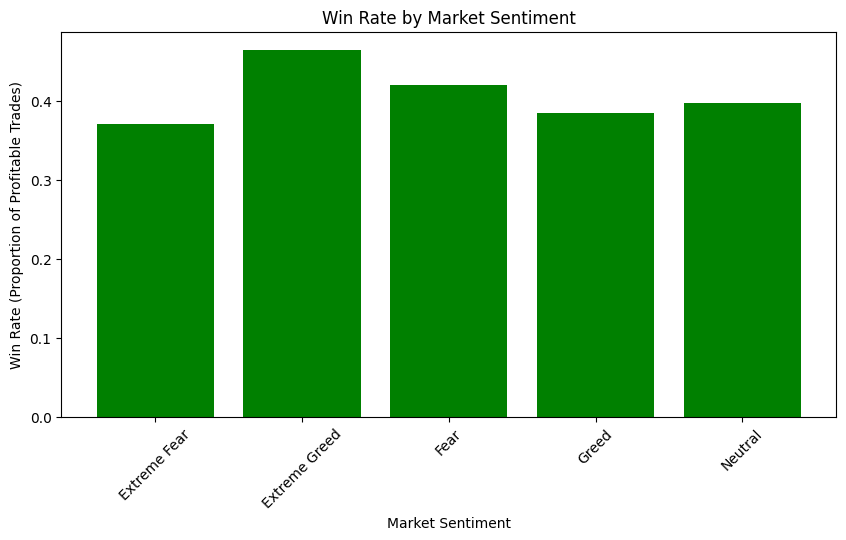

In [46]:
# Plot win rate by sentiment
plt.figure(figsize=(10,5))
plt.bar(win_rate['classification'], win_rate['win_rate'], color='green')
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate (Proportion of Profitable Trades)')
plt.xticks(rotation=45)

# Save the plot image in the outputs folder
plt.savefig('outputs/win_rate_by_sentiment.png')

plt.show()

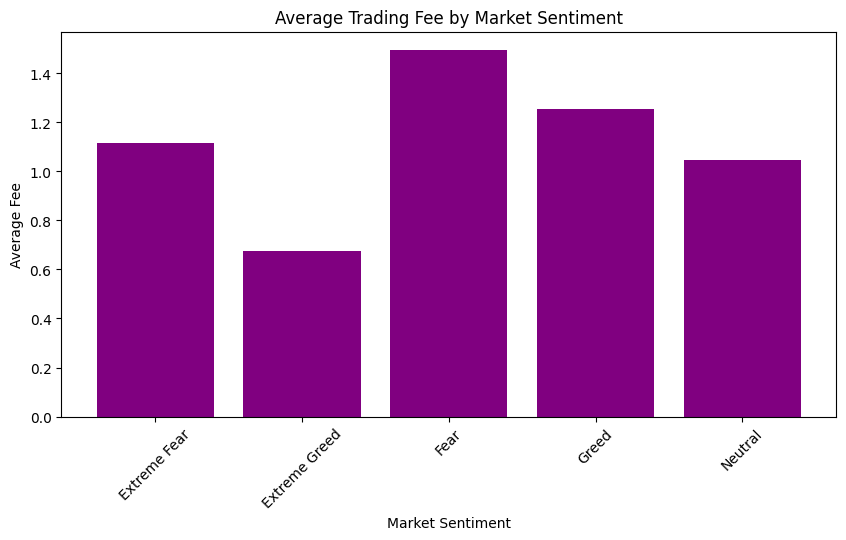

In [45]:
plt.figure(figsize=(10,5))
plt.bar(avg_fee['classification'], avg_fee['Fee'], color='purple')
plt.title('Average Trading Fee by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Fee')
plt.xticks(rotation=45)

# Save the plot image to outputs folder
plt.savefig('outputs/avg_fee_by_sentiment.png')
plt.show()

**Average Trading Fee by Market Sentiment**
The average trading fee is highest during 'Fear' sentiment and lowest during 'Extreme Greed.' This suggests that traders might be taking more frequent or larger actions during periods of high market anxiety, which could lead to greater overall fee expenditures.

**Win Rate by Market Sentiment**
Win rate is highest during 'Extreme Greed,' indicating trades are more likely to be profitable when market confidence is very strong. In contrast, win rates are lowest during 'Extreme Fear,' suggesting traders find it harder to succeed when the market is highly pessimistic.